<a href="https://colab.research.google.com/github/me5m7/System-Software-lab/blob/master/Approximating_Quadratic_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent Optimization
This notebook demonstrates the application of the JAX library in performing simple gradient descent, which is an excellent option for deep learning research. A basic model is constructed to be trained on a small dataset that represents a quadratic function. The objective of the model is to accurately approximate the quadratic function.

In [ ]:

import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit

## Model Creation

In [ ]:
# initilize a given layer by scaling the weights according to its input and output dimensions
def init_weights(input_dims, output_dims):
  return np.random.normal(size=(input_dims, output_dims)) * np.sqrt(2/input_dims)


# create a model providing the width of each layer
def init_model(widths):
  params = []
  for input_dims, output_dims in zip(widths[:-1], widths[1:]):
    params.append(dict(weights= init_weights(input_dims, output_dims), biases=np.ones(shape=(output_dims,))))
  return params


# create the model parameters (p)
p = init_model([1, 128, 124, 1])

In [ ]:

import jax
import jax.tree_util as tu
shapes=tu.tree_map(lambda x: x.shape, p)
print(shapes)

[{'biases': (128,), 'weights': (1, 128)}, {'biases': (124,), 'weights': (128, 124)}, {'biases': (1,), 'weights': (124, 1)}]


# Dataset

In [ ]:
# pick random samples for the input points
xs = np.random.normal(size=(128, 1))
# apply the quadratic function and get the true output y
ys = xs ** 2


## Forward and Backward Pass

In [ ]:
def forward(p, x):
    *hidden, last = p
    for layer in hidden:
        x = jax.nn.relu(x @ layer['weights'] + layer['biases'])
    return x @ last['weights'] + last['biases']


def loss_fn(p, x, y):
    yh = forward(p, x)
    return jnp.mean((yh - y) ** 2)


def update_rule(p, g):
    lr = 0.0001
    return p - lr * g

@jax.jit
def update(p, x, y):
    gradients = jax.grad(loss_fn)(p, x, y)
    return jax.tree.map(update_rule, p, gradients)

# Training and Testing

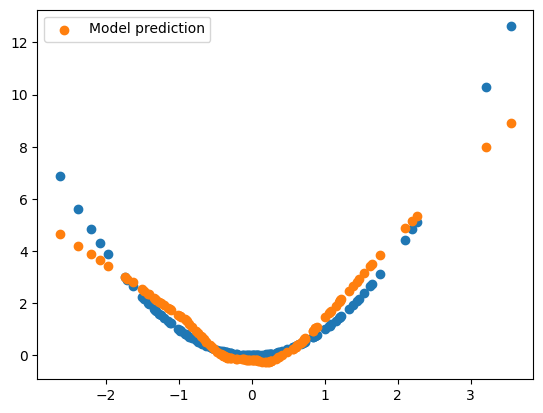

In [ ]:
# train the model for 1000 epochs
for _ in range(1000):
  p = update(p, xs, ys)

# Now use the input points to check
plt.scatter(xs, ys)
predictions = forward(p, xs)
plt.scatter(xs, predictions, label='Model prediction')
plt.legend()

# Adam Optimiser


Update	Gradient Descent Error	Adam Error
0	6.2168			1.1383
10	0.3913			0.3216
20	0.2192			0.4341
30	0.2111			0.2009
40	0.2081			0.2144
50	0.2053			0.1755
60	0.2026			0.1654
70	0.1999			0.1543
80	0.1973			0.1437
90	0.1948			0.1333
100	0.1923			0.1243
110	0.1898			0.1159
120	0.1875			0.1081
130	0.1851			0.1009
140	0.1829			0.0941
150	0.1807			0.0878
160	0.1785			0.0819
170	0.1764			0.0764
180	0.1743			0.0714
190	0.1723			0.0667
200	0.1703			0.0623
210	0.1684			0.0582
220	0.1665			0.0544
230	0.1647			0.0509
240	0.1629			0.0476
250	0.1612			0.0445
260	0.1594			0.0416
270	0.1578			0.0388
280	0.1561			0.0363
290	0.1545			0.0339
300	0.1530			0.0316
310	0.1514			0.0295
320	0.1496			0.0275
330	0.1481			0.0256
340	0.1466			0.0239
350	0.1452			0.0222
360	0.1438			0.0207
370	0.1424			0.0192
380	0.1410			0.0179
390	0.1397			0.0166
400	0.1384			0.0154
410	0.1372			0.0143
420	0.1360			0.0133
430	0.1348			0.0124
440	0.1336			0.0115
450	0.1325			0.0107
460	0.1314			0.0099
470	0.1303			0.0092
480	0.1292

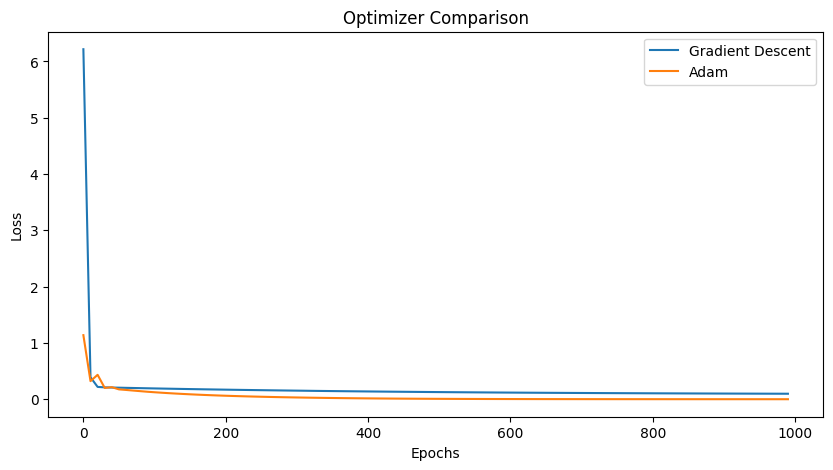

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit

# Initialize weights and biases with He initialization for ReLU activation
def init_weights(input_dim, output_dim):
    bound = np.sqrt(6 / input_dim)
    return (np.random.uniform(-bound, bound, (input_dim, output_dim)), np.zeros(output_dim))

# Model definition with ReLU activations
def model(params, x):
    activations = x
    for w, b in params[:-1]:
        activations = jax.nn.relu(jnp.dot(activations, w) + b)
    final_w, final_b = params[-1]
    return jnp.dot(activations, final_w) + final_b

# Mean Squared Error Loss function
def mse_loss(params, x, y):
    pred = model(params, x)
    return jnp.mean((pred - y) ** 2)

# Simple Gradient Descent update function
def update_params(params, grads, lr=0.001):
    return [(w - lr * dw, b - lr * db) for (w, b), (dw, db) in zip(params, grads)]

# Adam Optimizer
def init_adam(params):
    return [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params], [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params]

def update_adam(params, grads, ms, vs, t, lr=0.001, b1=0.9, b2=0.999, eps=1e-8):
    ms_updated = []
    vs_updated = []
    params_updated = []
    for (w, b), (dw, db), (m_w, m_b), (v_w, v_b) in zip(params, grads, ms, vs):
        m_w = b1 * m_w + (1 - b1) * dw
        m_b = b1 * m_b + (1 - b1) * db
        v_w = b2 * v_w + (1 - b2) * (dw**2)
        v_b = b2 * v_b + (1 - b2) * (db**2)
        m_w_hat = m_w / (1 - b1**t)
        m_b_hat = m_b / (1 - b1**t)
        v_w_hat = v_w / (1 - b2**t)
        v_b_hat = v_b / (1 - b2**t)
        w_updated = w - lr * m_w_hat / (jnp.sqrt(v_w_hat) + eps)
        b_updated = b - lr * m_b_hat / (jnp.sqrt(v_b_hat) + eps)
        ms_updated.append((m_w, m_b))
        vs_updated.append((v_w, v_b))
        params_updated.append((w_updated, b_updated))
    return params_updated, ms_updated, vs_updated

# Generate synthetic data
xs = np.linspace(-2, 2, 128).reshape(-1, 1)
ys = xs ** 2

# Initialize parameters
layer_sizes = [1, 64, 64, 1]
params = [init_weights(layer_sizes[i], layer_sizes[i + 1]) for i in range(len(layer_sizes) - 1)]

# Train with Gradient Descent
error_values_gd = []
params_gd = params.copy()
for epoch in range(1000):
    grads = grad(mse_loss)(params_gd, xs, ys)
    params_gd = update_params(params_gd, grads, lr=0.001)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_gd, xs, ys)
        error_values_gd.append(loss)

# Train with Adam Optimizer
error_values_adam = []
params_adam = params.copy()
ms, vs = init_adam(params_adam)
for epoch in range(1, 1001):
    grads = grad(mse_loss)(params_adam, xs, ys)
    params_adam, ms, vs = update_adam(params_adam, grads, ms, vs, epoch)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_adam, xs, ys)
        error_values_adam.append(loss)

# Print errors every 10 updates for both optimizers
print("Update\tGradient Descent Error\tAdam Error")
for i in range(min(len(error_values_gd), len(error_values_adam))):
    print(f"{i * 10}\t{error_values_gd[i]:.4f}\t\t\t{error_values_adam[i]:.4f}")

# Optionally, you can plot the results for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1000, 10), error_values_gd, label='Gradient Descent')
plt.plot(np.arange(0, 1000, 10), error_values_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimizer Comparison')
plt.show()


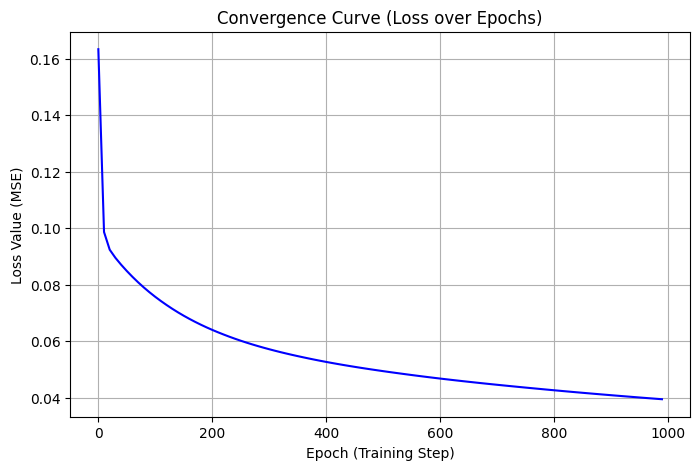

In [ ]:
# تهيئة قائمة لتسجيل قيمة الخسارة
loss_history = []

# تدريب النموذج لـ 1000 حقبة (epoch)
for i in range(1000):
  p = update(p, xs, ys)

  # حساب الخسارة وتسجيلها (كل 10 خطوات مثلاً لتسريع الأداء)
  if i % 10 == 0:
    current_loss = loss_fn(p, xs, ys)
    loss_history.append(current_loss)

# ---
# كود رسم مسار التقارب
plt.figure(figsize=(8, 5))
plt.plot(range(0, 1000, 10), loss_history, color='blue')
plt.title('Convergence Curve (Loss over Epochs)')
plt.xlabel('Epoch (Training Step)')
plt.ylabel('Loss Value (MSE)')
plt.grid(True)
plt.savefig('Convergence_Curve.png') # حفظ الرسم
plt.show()

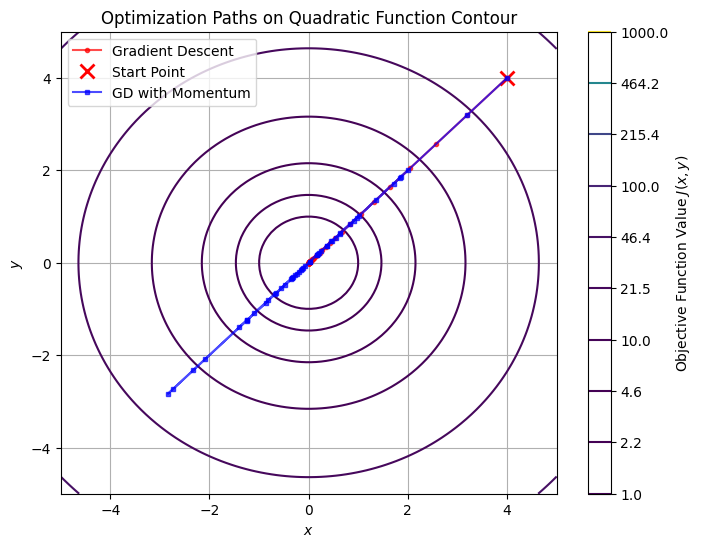

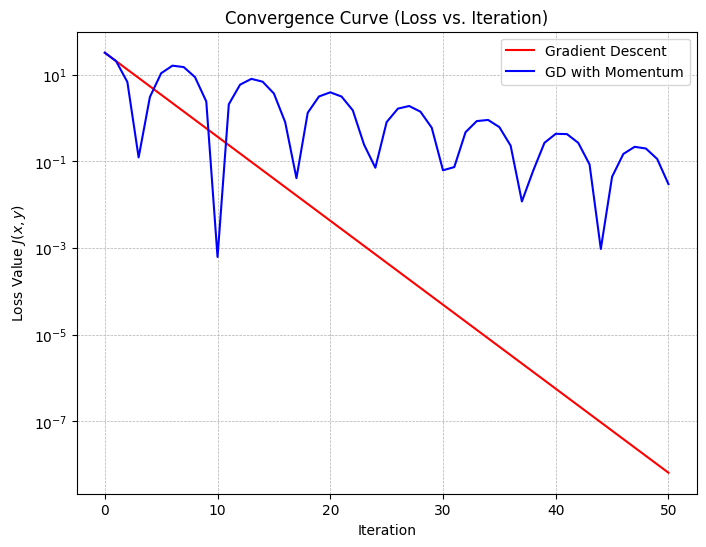

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    return x**2 + y**2

def gradient(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return np.array([grad_x, grad_y])

x_start, y_start = 4.0, 4.0
initial_position = np.array([x_start, y_start])
learning_rate = 0.1
momentum_beta = 0.9
iterations = 50

paths_gd = [initial_position]
losses_gd = [objective_function(x_start, y_start)]
paths_momentum = [initial_position]
losses_momentum = [objective_function(x_start, y_start)]

position_gd = initial_position.copy()
for i in range(iterations):
    grad = gradient(position_gd[0], position_gd[1])
    position_gd = position_gd - learning_rate * grad
    paths_gd.append(position_gd)
    losses_gd.append(objective_function(position_gd[0], position_gd[1]))

paths_gd = np.array(paths_gd)

position_momentum = initial_position.copy()
velocity = np.array([0.0, 0.0])

for i in range(iterations):
    grad = gradient(position_momentum[0], position_momentum[1])
    velocity = momentum_beta * velocity + grad
    position_momentum = position_momentum - learning_rate * velocity

    paths_momentum.append(position_momentum)
    losses_momentum.append(objective_function(position_momentum[0], position_momentum[1]))

paths_momentum = np.array(paths_momentum)

plt.figure(figsize=(8, 6))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
plt.colorbar(label='Objective Function Value $J(x, y)$')

plt.plot(paths_gd[:, 0], paths_gd[:, 1], 'r-o', label='Gradient Descent', markersize=3, alpha=0.7)
plt.plot(paths_gd[0, 0], paths_gd[0, 1], 'rx', label='Start Point', markersize=10, mew=2)

plt.plot(paths_momentum[:, 0], paths_momentum[:, 1], 'b-s', label='GD with Momentum', markersize=3, alpha=0.7)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Optimization Paths on Quadratic Function Contour')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
iterations_list = np.arange(iterations + 1)

plt.plot(iterations_list, losses_gd, 'r-', label='Gradient Descent')

plt.plot(iterations_list, losses_momentum, 'b-', label='GD with Momentum')

plt.xlabel('Iteration')
plt.ylabel('Loss Value $J(x, y)$')
plt.title('Convergence Curve (Loss vs. Iteration)')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()